In [1]:
#comment
#observation are very important in EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv("student.csv")

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
data.shape

(1000, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
data["gender"].dtypes

dtype('O')

In [9]:
data["gender"].dtypes=="O"

True

In [10]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [11]:
cat_col=[fea for fea in data.columns if data[fea].dtype=="O"]

In [12]:
num_col=[fea for fea in data.columns if data[fea].dtype!="O"]

In [13]:
data[cat_col]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [14]:
data[num_col]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [15]:
data.memory_usage()

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

### Missing value

In [16]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [17]:
data.isnull().sum().sum()#there is no missing value

0

In [18]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [19]:
data.duplicated().sum()#there is no duplicate value

0

### Unique value

In [20]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [21]:
data["gender"].unique()

array(['female', 'male'], dtype=object)

In [22]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [23]:
data.describe().T # transpose

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [24]:
# corelation of the data
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [25]:
# covariance of the data
data.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


In [26]:
# skewness of the data
data.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

<AxesSubplot:xlabel='math score', ylabel='Density'>

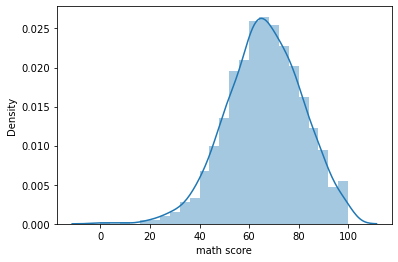

In [27]:
sns.distplot(data["math score"])

In [28]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [29]:
# to find avg data
data["Average"]=(data["math score"]+data["reading score"]+data["writing score"])/3

In [30]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [31]:
data.groupby("gender").median()

,math score,reading score,writing score,Average
gender,,,,
female,65.0,73.0,74.0,70.333333
male,69.0,66.0,64.0,66.333333


In [32]:
data.groupby("gender").count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
gender,,,,,,,,
female,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482


In [33]:
data[data["math score"]<30]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
91,male,group C,high school,free/reduced,none,27,34,36,32.333333
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
327,male,group A,some college,free/reduced,none,28,23,19,23.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
363,female,group D,some high school,free/reduced,none,27,34,32,31.000000
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
528,female,group D,bachelor's degree,free/reduced,none,29,41,47,39.000000
601,female,group C,high school,standard,none,29,29,30,29.333333


In [34]:
data[data["math score"]<30].count()

gender                         14
race/ethnicity                 14
parental level of education    14
lunch                          14
test preparation course        14
math score                     14
reading score                  14
writing score                  14
Average                        14
dtype: int64

In [35]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Average'],
      dtype='object')

In [36]:
data_num=data[num_col]

In [37]:
data_num.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [38]:
from scipy.stats import normaltest

In [39]:
normaltest(data_num["math score"])[1]*100 # p value non normally distributed

0.04508029386993784

In [40]:
# if p value is > 0.05 then my data will be normal distributed

<AxesSubplot:xlabel='math score', ylabel='Density'>

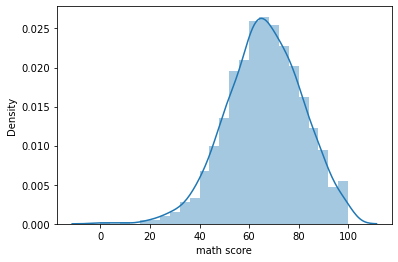

In [41]:
sns.distplot(data_num["math score"])

In [42]:
# outlier

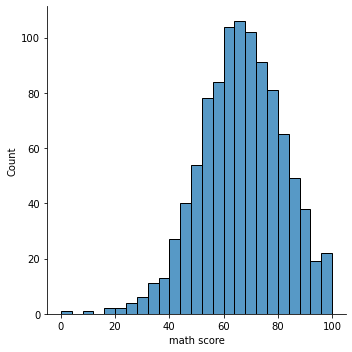

In [43]:
sns.displot(data_num["math score"])

<AxesSubplot:>

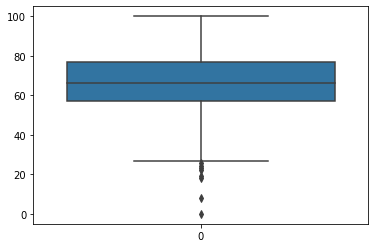

In [44]:
sns.boxplot(data=data["math score"])

<AxesSubplot:>

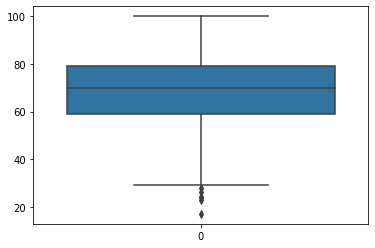

In [45]:
sns.boxplot(data=data["reading score"])

<AxesSubplot:>

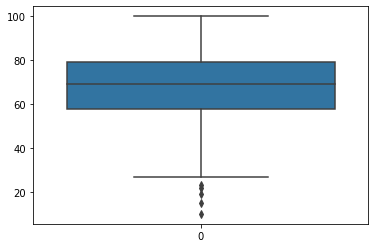

In [46]:
sns.boxplot(data=data["writing score"])

In [47]:
q1=data["math score"].quantile(0.25) 

In [48]:
q3=data["math score"].quantile(0.75) 

In [49]:
IQR = q3-q1

In [50]:
IQR

20.0

In [51]:
upper_limit = q3 + 1.5*IQR

In [52]:
upper_limit

107.0

In [53]:
lower_limit = q1 - 1.5*IQR

In [54]:
lower_limit

27.0

In [55]:
data[data["math score"]>upper_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average


In [56]:
data_outlier=data[data["math score"]<lower_limit]

In [57]:
data_outlier

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
787,female,group B,some college,standard,none,19,38,32,29.666667
842,female,group B,high school,free/reduced,completed,23,44,36,34.333333
980,female,group B,high school,free/reduced,none,8,24,23,18.333333


In [58]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [59]:
data["math score"].min()

0

In [60]:
data["math score"].max()

100

In [61]:
data["math score"].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

In [62]:
data_num.columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [63]:
def outlier_threshold(df,variable):
    q1 = df[variable].quantile(0.25)
    q2 = df[variable].quantile(0.75)
    iqr = q2-q1
    up_limit = q2 +(1.5*iqr)
    lower_limit = q1 -(1.5*iqr)
    return lower_limit,up_limit
    

In [64]:
for variable in data_num.columns:
    lower_limit,up_limit = outlier_threshold(data_num,variable)

In [65]:
def replace_with_threshold(data,numeric_col):
    for variable in numeric_col:
        low_limit,upper_limit=outlier_threshold(data_num,variable)
        data.loc[data[variable]<low_limit,variable]=lower_limit
        data.loc[data[variable]>upper_limit,variable]=upper_limit

In [66]:
replace_with_threshold(data_num,data_num.columns)

In [67]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [68]:
data_num.loc[data_num["math score"]<lower_limit,"math score"]=lower_limit

In [69]:
data_num

,math score,reading score,writing score
0,72.0,72.0,74.0
1,69.0,90.0,88.0
2,90.0,95.0,93.0
3,47.0,57.0,44.0
4,76.0,78.0,75.0
...,...,...,...
995,88.0,99.0,95.0
996,62.0,55.0,55.0
997,59.0,71.0,65.0
998,68.0,78.0,77.0


### Graph Analysis

In [70]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


<AxesSubplot:xlabel='gender', ylabel='count'>

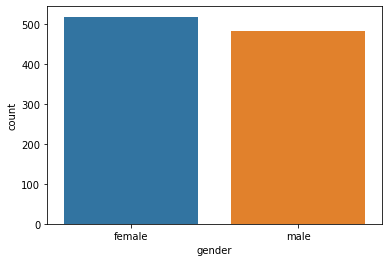

In [71]:
sns.countplot(data["gender"])

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

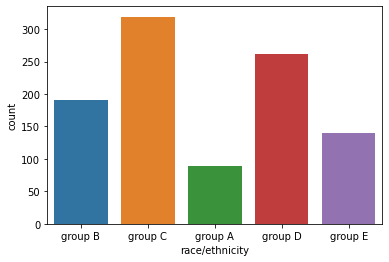

In [72]:
sns.countplot(data["race/ethnicity"])

In [73]:
df=data.groupby("gender").mean()

In [74]:
df

,math score,reading score,writing score,Average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [75]:
df["Average"][0]

69.56949806949807

In [76]:
df["Average"][1]

65.8374827109267

In [77]:
df["math score"][0]

63.633204633204635

In [78]:
df["math score"][1]

68.72821576763485

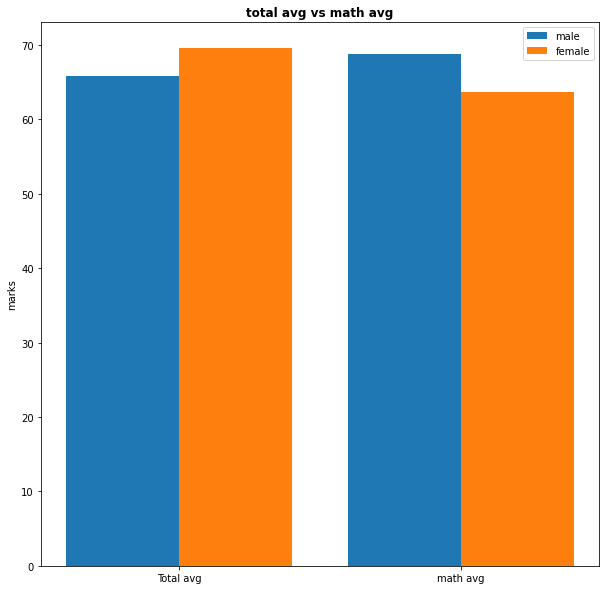

In [79]:
plt.figure(figsize=(10,10))
X=["Total avg","math avg"]
female_score=df["Average"][0],df["math score"][0]
male_score=df["Average"][1],df["math score"][1]
X_axis=np.arange(len(X))
plt.bar(X_axis-0.2,male_score,0.4,label="male")
plt.bar(X_axis+0.2,female_score,0.4,label="female")
plt.xticks(X_axis,X)
plt.ylabel("marks")
plt.title("total avg vs math avg",fontweight="bold")
plt.legend()
plt.show()


<AxesSubplot:>

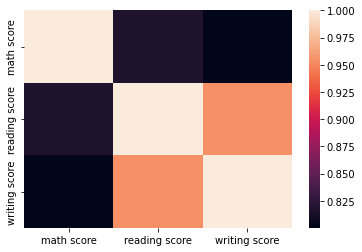

In [80]:
sns.heatmap(data_num.corr())

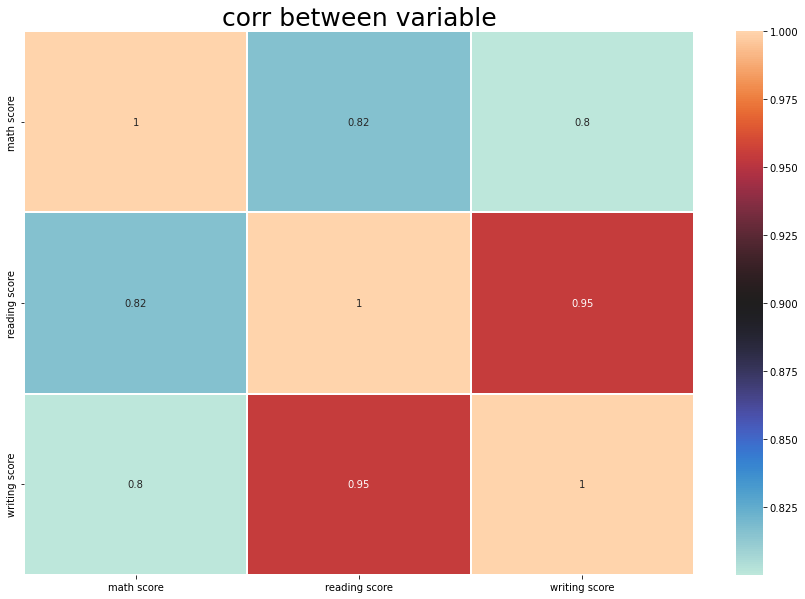

In [81]:
sns.heatmap(data_num.corr(),annot=True,cmap='icefire',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("corr between variable",color="black",size=25)
plt.show()

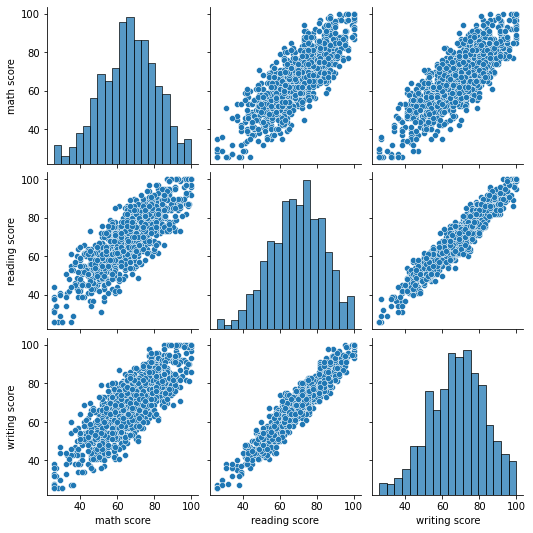

In [82]:
sns.pairplot(data_num)

<AxesSubplot:xlabel='math score', ylabel='writing score'>

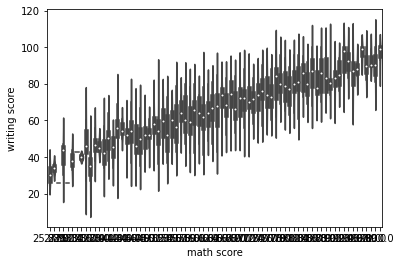

In [83]:
sns.violinplot(data=data_num, x=data_num["math score"], y=data_num["writing score"])

<AxesSubplot:>

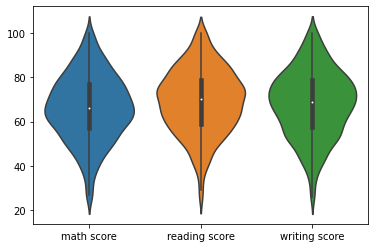

In [84]:
sns.violinplot(data=data_num)

In [85]:
# task
10 data set
pick anyone
perform detail EDA in one ipynb
perform missing value if it is there in one ipynb
perform outlier handle if it is there in one ipynb
perform encoding
perform scalling
perform feature selection
perform transformation

book,different artical,research paper or youtube
sunny.savita@ineuron.ai
krish,naik@ineuron.ai

SyntaxError: invalid syntax (Temp/ipykernel_4752/964646765.py, line 2)